# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = ".\\train.p"
testing_file = ".\\test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

import numpy as np

n_train = X_train.shape[0]

n_test = X_test.shape[0]

image_shape = (X_train.shape[1], X_train.shape[2])

n_classes = np.unique(y_test).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Label shape =", y_train.shape)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43
Label shape = (39209,)


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Source for genfromtxt: https://carnd-forums.udacity.com/questions/18451906/answers/18451962, Author: Bharat Ramanathan.

import numpy as np
signname_bytes = np.genfromtxt('signnames.csv', delimiter=',', skip_header=1, usecols=(1,), unpack=True, dtype=None)

signname_map = {}
for i in range(len(signname_bytes)):
    s = signname_bytes[i].tostring().decode("utf-8")
    signname_map[i] = s

Class ID, Sign Name, Training Example Count
0, Speed limit (20km/h), 210
1, Speed limit (30km/h), 2220
2, Speed limit (50km/h), 2250
3, Speed limit (60km/h), 1410
4, Speed limit (70km/h), 1980
5, Speed limit (80km/h), 1860
6, End of speed limit (80km/h), 420
7, Speed limit (100km/h), 1440
8, Speed limit (120km/h), 1410
9, No passing, 1470
10, No passing for vehicles over 3.5 metric tons, 2010
11, Right-of-way at the next intersection, 1320
12, Priority road, 2100
13, Yield, 2160
14, Stop, 780
15, No vehicles, 630
16, Vehicles over 3.5 metric tons prohibited, 420
17, No entry, 1110
18, General caution, 1200
19, Dangerous curve to the left, 210
20, Dangerous curve to the right, 360
21, Double curve, 330
22, Bumpy road, 390
23, Slippery road, 510
24, Road narrows on the right, 270
25, Road work, 1500
26, Traffic signals, 600
27, Pedestrians, 240
28, Children crossing, 540
29, Bicycles crossing, 270
30, Beware of ice/snow, 450
31, Wild animals crossing, 780
32, End of all speed and passing

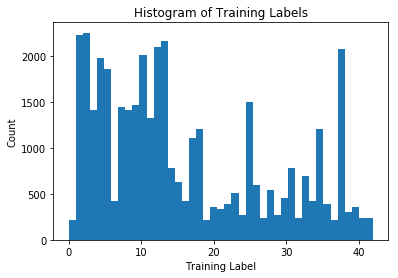

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Histogram of training labels.
def plot_histogram(y, bins, titleprefix):
    plt.hist(y, bins)
    plt.xlabel(titleprefix + ' Label')
    plt.ylabel('Count')
    plt.title('Histogram of ' + titleprefix + ' Labels')
    
plot_histogram(y_train, n_classes, 'Training')

[hist, bin_edges] = np.histogram(y_train, n_classes)

print('Class ID, Sign Name, Training Example Count')

for i in range(len(hist)):
    print('{}, {}, {}'.format(i, signname_map[i], hist[i]))

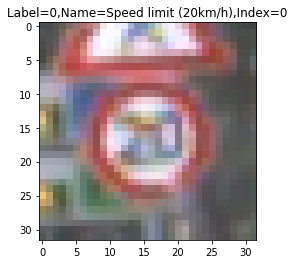

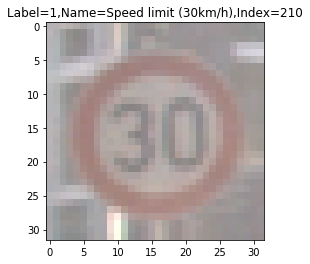

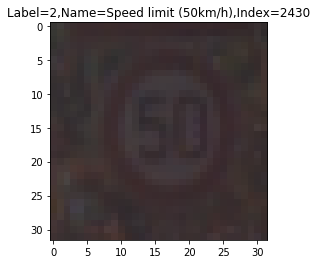

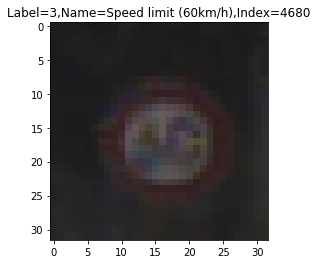

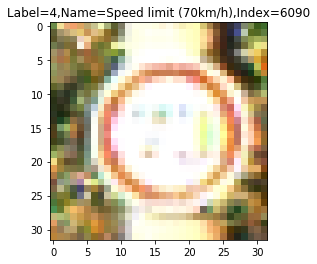

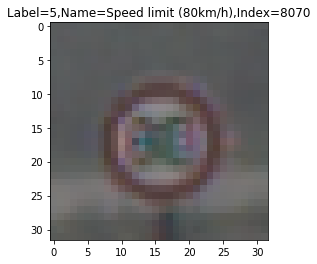

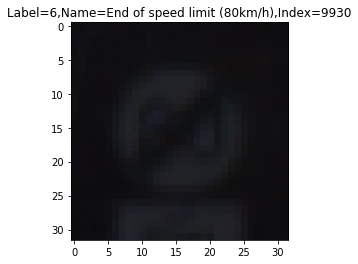

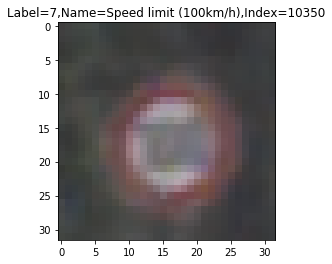

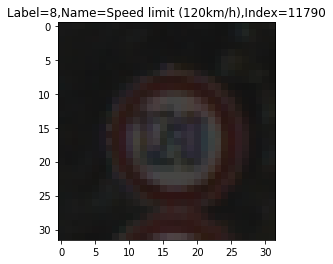

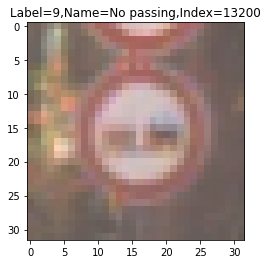

In [5]:
# Draw some training examples.
def draw_image(image, title, fignum):
    plt.figure(fignum)
    plt.imshow(image)
    plt.title(title)

def draw_sign(label_to_draw, fignum, desired_count):
    count = 0    
    for i in range(len(X_train)):
        if y_train[i] == label_to_draw:
            count += 1
            draw_image(X_train[i], 'Label={},Name={},Index={}'.format(str(label_to_draw), signname_map[label_to_draw], str(i)), fignum + count)
            if count >= desired_count:
                return

# draw_sign(2, 1, 3)
        
for label in range(10):
    draw_sign(label, fignum=label, desired_count=1)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Stopwatch Class

In [6]:
import datetime
def format_seconds(secs):
    delta = datetime.timedelta(seconds=int(secs))
    return str(delta)

def format_now():
    return datetime.datetime.now().strftime('%Y-%m-%d_%Hh%Mm%S')

import time
start = time.monotonic()
end = time.monotonic()
print(format_seconds(end - start))
print(format_now())

0:00:00
2017-01-29_22h48m54


In [7]:
import time

class Stopwatch:
    def __init__(self, autostart = True):
        self._duration = 0
        self._started = False
        self._start = 0
        if (autostart):
            self.start()
        
    def start(self):
        if not self._started:
            self._started = True
            self._start = time.monotonic()
        return self
    
    def stop(self):
        if not self._started:
            raise RuntimeError('Cannot stop stopwatch that has not been started.')
        end = time.monotonic()
        self._duration += (end - self._start)
        self._started = False
        self._start = 0
        
    def reset(self):
        self._duration = 0
        self._started = False
        self._start = 0
        
    def format_duration(self):
        return format_seconds(self._duration)
    
sw = Stopwatch().start()
sw.stop()
print(sw.format_duration())

0:00:00


### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Normalization is performed below, after generating additional data.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

### Answer:

I normalized the image data with Min-Max scaling to a range of [0.1, 0.9]. I do this after generating additional training data through jittering below, and that depends on RGB images.

I wanted to let the neural network learn whatever processing was appropriate for classifying the images. I considered performing YUV-conversion and Y-channel global and local contrast normalization as described in [1], but I decided to simply add a color-space transformation layer as described in [2]. This let the neural network figure out the best color-space transformation for this classification problem.

[1] Pierre Sermanet and Yann LeCun, Traffic Sign Recognition with Multi-Scale Convolutional Networks, URL: http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf. Retrieved 1/19/2017.

[2] Alexandros Karargyris, Color Space Transformation Network, URL: https://arxiv.org/ftp/arxiv/papers/1511/1511.01064.pdf. Retrieved 1/19/2017.

In [9]:
### Author: Vivek Yadav
### https://github.com/vxy10/ImageAugmentation

import cv2
import numpy as np

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    # Brightness
    if brightness == 1:
        img = augment_brightness_camera_images(img)

    return img

In [10]:
def mutate_image(image):
    return transform_image(image, 10, 4, 2, brightness=1)

In [11]:
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets.
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)

(35288, 32, 32, 3)
(35288,)
(3921, 32, 32, 3)
(3921,)


In [12]:
### Generate additional data.

import random

# This generates extra number of training examples per initial training example.
def generate_extra_data(X, y, extra):
    total_train_size = X.shape[0] * (1 + extra)

    JX = np.zeros([total_train_size, X.shape[1], X.shape[2], X.shape[3]], np.uint8)
    Jy = np.zeros([total_train_size], np.uint8)

    J_index = 0
    total_generated = 0
    
    for i in range(X.shape[0]):
        curx = X[i]
        cury = y[i]
        
        base = (extra + 1) * i
        JX[base] = curx
        Jy[base] = cury
        
        for x in range(extra):
            offset = x + 1
            JX[base + offset] = mutate_image(curx)
            Jy[base + offset] = cury
            total_generated += 1

    print('Done generating. total_generated=', total_generated)
    
    return [JX, Jy]

# This generates extra data such that each class has min_train_size number of training examples.
def generate_extra_data_min(X, y, min_train_size):
    total_train_size = 0

    [hist, bin_edges] = np.histogram(y, n_classes)

    for count in hist:
        if (count > min_train_size):
            total_train_size += count
        else:
            total_train_size += min_train_size

    JX = np.zeros([total_train_size, X.shape[1], X.shape[2], X.shape[3]], np.uint8)
    Jy = np.zeros([total_train_size], np.uint8)

    J_index = 0
    total_generated = 0
    for label in range(n_classes):
        label_examples = np.where(y == label)[0]

        # Copy over existing training examples.
        for i in range(label_examples.size):
            JX[J_index] = X[label_examples[i]]
            Jy[J_index] = y[label_examples[i]]
            J_index += 1

        # Generate mutated examples if needed.
        if label_examples.size < min_train_size:
            generate_count = min_train_size - label_examples.size

            for i in range(generate_count):
                chosen = label_examples[random.randrange(label_examples.size)]
                JX[J_index] = mutate_image(X[chosen])
                Jy[J_index] = label
                J_index += 1

            total_generated += generate_count

    print('Done generating. total_generated=', total_generated)
    
    return [JX, Jy]
    
[JX_train, Jy_train] = generate_extra_data(X_train, y_train, 10)
#[JX_train, Jy_train] = generate_extra_data_min(X_train, y_train, 10000)

Done generating. total_generated= 352880


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

### Answer:

#### Splitting Training, Validation, and Testing Data
I set aside the test data (X_test, y_test) and did not touch it until the end of my model development when measuring the test accuracy.

I split the training data (X_train, y_train) into 2 sets: training and validation data (X_train, y_train) and (X_validation, y_validation). 10% of the original training data was randomly selected and separated as the validation data.

Notice that the training data is not uniformly distributed between labels.

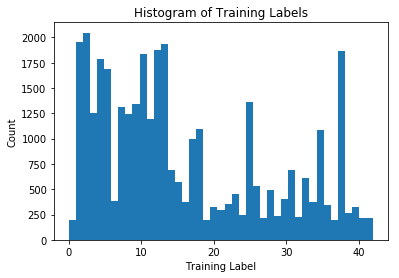

In [13]:
plot_histogram(y_train, n_classes, 'Training')

### Answer (continued):
#### Generating Additional Data
A histogram of the training labels shows a non-uniform distribution (see the above cell). Some of the classes have as few as 200 examples. To give my model plenty of data to learn from and to make it more robust against pictures of traffic signs at angles and with poor lighting, I generated additional data.

I generated additional data using a helper function "transform_image" written by Vivek Yadav found at [3]. It generates a new image using OpenCV to rotate, shear, translate, and augment the brightness of an existing image. I found that too much jitter reduced my validation accuracy. This was probably because excessive jitter results in training data that are so different from the original data that they mislead the model. I experimented with different ranges of rotation, shear, and translation until validation accuracy was better than without the additional data.

I tried two approaches: 
1. Scale up the count of training examples by some factor, thereby keeping the above non-uniform distribution.
2. Increase the count of training examples to cause a uniform distribution of classes.

The first approach resulted in a better validation accuracy.

[3] Vivek Yadav, Image Augmentation, URL: https://github.com/vxy10/ImageAugmentation, Retrieved: 1/20/2017.

In [14]:
# Use jittered training data as training data.
[X_train, y_train] = [JX_train, Jy_train]

In [15]:
import tensorflow as tf

tf.reset_default_graph()

MAX_EPOCHS = 200
BATCH_SIZE = 128

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

class NeuralNetworkBuilder:
    def __init__(self, mu, sigma, keep_prob):
        self.mu = mu
        self.sigma = sigma
        self.keep_prob = keep_prob

    def conv_activation(self, x, filter_height, filter_width, in_depth, out_depth):
        h = (tf.nn.conv2d(x, 
                          tf.Variable(tf.truncated_normal([filter_height, filter_width, in_depth, out_depth], mean = mu, stddev = sigma)), 
                          [1, 1, 1, 1], 
                          'VALID') 
                  + tf.Variable(tf.zeros(out_depth)))

        # Activation.
        return tf.nn.relu(h)

    def conv5x5_activation(self, x, in_depth, out_depth):
        return self.conv_activation(x, 5, 5, in_depth, out_depth)

    def conv3x3_activation(self, x, in_depth, out_depth):
        return self.conv_activation(x, 3, 3, in_depth, out_depth)

    def maxpool(self, x):
        return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    def dropout(self, x):
        return tf.nn.dropout(x, self.keep_prob)

    def fully_connected(self, x, in_count, out_count):
        return (tf.matmul(x, 
                          tf.Variable(tf.truncated_normal((in_count, out_count), mean = mu, stddev = sigma)))
                + tf.Variable(tf.zeros(out_count)))

    def make_branch(self, h, depth):
        # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28xdepth.
        h = self.conv5x5_activation(h, 3, depth)

        # Convolutional. Output = 24x24x(depth*1.5).
        h = self.conv5x5_activation(h, depth, int(depth * 3 / 2))

        # Convolutional. Output = 20x20x(depth*2).
        h = self.conv5x5_activation(h, int(depth * 3 / 2), depth * 2)

        # Output = 10x10x(depth*2)
        h = self.maxpool(h)

        # Convolutional. Output = 8x8x(depth*2.5).
        h = self.conv3x3_activation(h, depth * 2, int(depth * 5 / 2))

        # Pooling.
        h = self.dropout(h)

        return h

    def build(self, x):
        # Let this layer modify color. Input = 32x32x3. Ouput = 32x32x3. 
        # This layer is inspired by "Color Space Transformation Network" at https://arxiv.org/ftp/arxiv/papers/1511/1511.01064.pdf.
        h = self.conv_activation(x, 1, 1, 3, 3)

        # This branch-then-merge architecture is inspired by Vivek Yadav's post.
        # https://chatbotslife.com/german-sign-classification-using-deep-learning-neural-networks-98-8-solution-d05656bf51ad
        b1 = self.make_branch(h, 32)
        b2 = self.make_branch(h, 64)
        b3 = self.make_branch(h, 128)

        # Merge branches. Output = 8x8x560.
        h = tf.concat_v2([b1, b2, b3], axis=3)

        # Flatten. Output = concat_dim.
        h = flatten(h)

        concat_dim = h.get_shape().dims[1].value

        print('concat_dim= ', concat_dim)

        # Output = 800.
        h = self.fully_connected(h, concat_dim, 800)

        # Activation.
        h = self.dropout(h)

        # Output = 400.
        h = self.fully_connected(h, 800, 400)

        # Activation.
        h = self.dropout(h)

        # Output = n_classes.
        h = self.fully_connected(h, 400, n_classes)

        h = self.dropout(h)

        return h

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My final architecture is a convolutional neural network. I augmented the LeNet architecture with more layers, deeper convolutional layers, and wider fully connected layers. Inspired by Vivek Yadav's post [4], I added a branch-then-merge section at the start. Each branch is a series of convolutional layers, a maxpool, and a dropout layer. Each branch has a different convolutional filter depth.

[4] Vivek Yadav, (98.8% solution) German sign classification using deep learning neural networks, URL:  https://chatbotslife.com/german-sign-classification-using-deep-learning-neural-networks-98-8-solution-d05656bf51ad. Retrieved 1/27/2017.

In [17]:
### Train your model here.
### Feel free to use as many code cells as needed.

### One-hot encode labels.

def safe_one_hot(y, num_labels):
    # From https://github.com/tensorflow/tensorflow/issues/6509
    sparse_labels = tf.reshape(y, [-1, 1])
    derived_size = tf.shape(sparse_labels)[0]
    indices = tf.reshape(tf.range(0, derived_size, 1), [-1, 1])
    concated = tf.concat(1, [indices, sparse_labels])
    outshape = tf.concat(0, [tf.reshape(derived_size, [1]), tf.reshape(num_labels, [1])])
    one_hot_y = tf.sparse_to_dense(concated, outshape, 1.0, 0.0)
    return one_hot_y

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
# one_hot_y = tf.one_hot(y, n_classes)
one_hot_y = safe_one_hot(y, n_classes)

### Calculate logits, cross-entropy, loss, and setup optimizer.

rate = 0.0001

kp = tf.placeholder(tf.float32)

# Hyperparameters
mu = 0
sigma = 0.1

builder = NeuralNetworkBuilder(mu, sigma, kp)

logits = builder.build(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

concat_dim=  35840


In [18]:
### Evaluate accuracy.

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, kp: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [19]:
def normalize(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    rgb_min = 0
    rgb_max = 255
    return a + ( ( (image_data - rgb_min)*(b - a) )/( rgb_max - rgb_min ) )

X_train = normalize(X_train)
X_validation = normalize(X_validation)
X_test = normalize(X_test)

In [20]:
def predict(sess, X_pred):
    softmax = tf.nn.softmax(logits)
    output = sess.run(softmax, feed_dict={x: X_pred, kp: 1.0})
    predictions = np.argmax(output, axis = 1)
    return predictions

usa_signs = ['bend_right.png',
             'do_not_enter.png',
             'speed_limit.png',
             'stop_sign.png',
             'yield.png']

europe_signs = ['german_do_not_enter.png',
                'german_priority.png',
                'german_keep_right.png',
                'german_no_passing.png',
                'uk_speed_limit_50.png']

test_files = usa_signs + europe_signs

import matplotlib.image as mpimg

def read_test_images():
    X = []
    for file in test_files:
        img = mpimg.imread('.\\test_images\\' + file)
        X.append(img)
    X = np.array(X)
    return normalize(X)
    
def predict_test_images(sess):
    X = read_test_images()
    predictions = predict(sess, X)
    
    for i in range(len(test_files)):
        id_pred = predictions[i]
        print('Actual: [{}], Prediction: [{}], (Id: {})'.format(test_files[i], signname_map[id_pred], id_pred))
        print()

In [21]:
# Measure accuracy of model with test set.

def evaluate_test_accuracy(sess):
    test_stopwatch = Stopwatch()
    
    test_accuracy = evaluate(X_test, y_test)
    
    test_stopwatch.stop()

    print("Test Set Size: ", len(y_test))
    print()
    print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
    print()
    print("Duration: {}".format(test_stopwatch.format_duration()))
    print()

In [22]:
### Train model.

from sklearn.utils import shuffle
import time

train_model = False
epochs_since_improvement_limit = 2
min_accuracy = 0.99
keep_prob_during_training = 0.4

if (train_model):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        best_validation_accuracy = 0.0
        best_train_accuracy = 0.0

        print("Training... num_examples: ", num_examples)
        print()
        print("EPOCH, ValAcc, TrainSubsetAcc, Duration")
        print()

        train_stopwatch = Stopwatch()

        for i in range(MAX_EPOCHS):
            epoch_stopwatch = Stopwatch()

            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, kp: keep_prob_during_training})

            validation_accuracy = evaluate(X_validation, y_validation)

            val_size = len(y_validation)
            train_accuracy = evaluate(X_train[:val_size], y_train[:val_size])
            
            if validation_accuracy > best_validation_accuracy:
                best_validation_accuracy = validation_accuracy
                epochs_since_improvement = 0
            #elif train_accuracy > best_train_accuracy:
                #best_train_accuracy = train_accuracy
                #epochs_since_improvement = 0
            else:
                epochs_since_improvement += 1            

            epoch_stopwatch.stop()

            print("{}, {:.3f}, {:.3f}, {}".format(i+1, validation_accuracy, train_accuracy, epoch_stopwatch.format_duration()))
            print()

            if (epochs_since_improvement >= epochs_since_improvement_limit 
                and best_validation_accuracy >= min_accuracy):
                #and best_train_accuracy >= min_accuracy):
                print("Stopping early. Validation accuracy has not improved in {} epochs.".format(epochs_since_improvement_limit))
                print()
                break

        train_stopwatch.stop()

        print("Training Duration: ", train_stopwatch.format_duration())
        print()    
        print("Best Validation Accuracy: ", best_validation_accuracy)
        print()

        model_filename = '.\\cnn_branch_pyramid_{:.1f}_{}'.format(best_validation_accuracy * 100, format_now())
        saver.save(sess, model_filename)
        print("Model saved: ", model_filename)
else:
    print('Train model: ', train_model)
    print()

Train model:  False



## Training Output
### Setup: 4 conv layers in 3 branches, dropouts between fully connected layers, learning rate=0.0001, 10 examples per example, keep_prob=0.4

Training... num_examples:  388168

EPOCH, ValAcc, TrainSubsetAcc, Duration

1, 0.455, 0.397, 0:06:46

2, 0.559, 0.512, 0:06:43

3, 0.737, 0.654, 0:06:39

4, 0.885, 0.812, 0:06:39

5, 0.946, 0.886, 0:06:39

6, 0.966, 0.936, 0:06:40

7, 0.983, 0.952, 0:06:46

8, 0.990, 0.956, 0:06:44

9, 0.993, 0.973, 0:06:44

10, 0.995, 0.979, 0:06:45

11, 0.996, 0.984, 0:06:39

12, 0.996, 0.979, 0:06:38

13, 0.997, 0.989, 0:06:43

14, 0.996, 0.987, 0:06:43

15, 0.998, 0.988, 0:06:42

16, 0.998, 0.992, 0:06:44

17, 0.997, 0.993, 0:06:41

Stopping early. Validation accuracy has not improved in 2 epochs.

Training Duration:  1:54:03

Best Validation Accuracy:  0.997704667177

Model saved:  .\cnn_branch_pyramid_99.8_2017-01-26_16h58m44

In [23]:
def get_model_filename():
    if train_model:
        return model_filename
    else:
        return '.\\cnn_branch_pyramid_99.8_2017-01-26_16h58m44'

In [24]:
with tf.Session() as sess:
    model = get_model_filename()
    
    # http://stackoverflow.com/questions/33759623/tensorflow-how-to-restore-a-previously-saved-model-python
    saver = tf.train.import_meta_graph(model + '.meta')
    saver.restore(sess, model)
    
    print('Restored model: ', model)
    print()
    
    evaluate_test_accuracy(sess)

Restored model:  .\cnn_branch_pyramid_99.8_2017-01-26_16h58m44

Test Set Size:  12630

Test Accuracy: 98.27%

Duration: 0:00:05



## Model Test Accuracy

### My trained model achieves a test set accuracy of 98.27%.

Restored model: .\cnn_branch_pyramid_99.8_2017-01-26_16h58m44

Test Set Size: 12630

Test Accuracy: 98.27

Duration: 0:00:03

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I trained my model with AdamOptimizer and these hyperparameters:
- Batch size: 128
- Epochs (with early stopping): 200
- Dropout probability: 0.4
- Learning rate: 0.0001
- Number of jittered images per training example: 10
- (mu, sigma) for weight initialization: (0, 0.1)
- Epochs since improvement for early stop: 2

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

My process was mostly trial and error. I started with a LeNet architecture, read some articles and papers, and tried different changes. When I saw the validation accuracy improve enough, I kept the change.

I tried other optimizers but compared to AdamOptimizer, some were slower to reach the highest accuracy and others reached a lower validation accuracy.

Early-stopping usually kicked in during training. In my final training run, it stopped after 17 epochs.

I tried lower dropout probabilities like 0.2, but when I did that, the training seemed to get stuck at a low validation accuracy (like 5%).

I tried learning rates of 0.001 and 0.0001 and achieved a slightly improved validation accuracy with the smaller learning rate.

I tried different approaches for generating jittered images. 
1. Scale up the count of training examples by some factor, thereby keeping the above non-uniform distribution.
2. Increase the count of training examples to cause a uniform distribution of classes.

The first approach resulted in better validation accuracy, likely because the distribution of labels was closer between the training set and validation set.

I did not try different values of (mu, sigma) for weight initialization.

I tried larger values for "epochs since improvement for early stop" but I realized that could risk overfitting, so I lowered to 2.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

American Traffic Signs


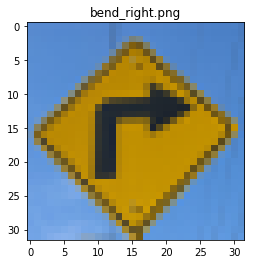

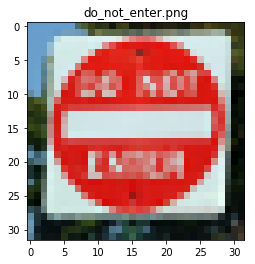

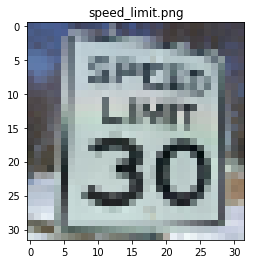

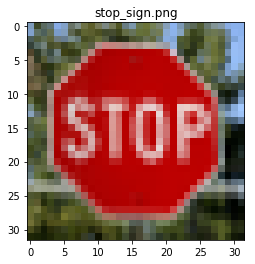

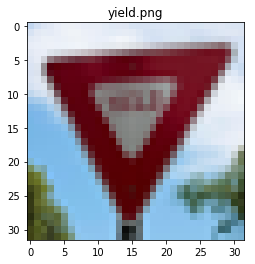

In [25]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def draw_images(files):
    fignum = 0

    for file in files:
        img = mpimg.imread('.\\test_images\\' + file)
        fignum += 1
        draw_image(img, file, fignum)

print('American Traffic Signs')
draw_images(usa_signs)

Europe Traffic Signs


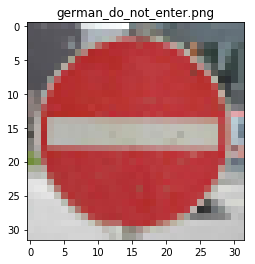

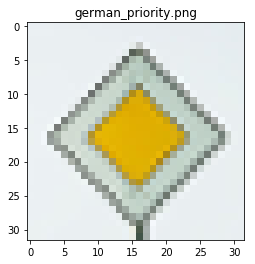

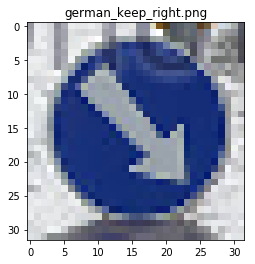

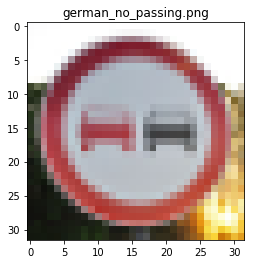

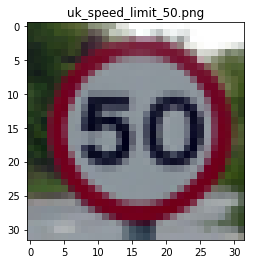

In [26]:
print('Europe Traffic Signs')
draw_images(europe_signs)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I found 5 images each of:
- American traffic signs
- German/UK traffic signs

The American traffic signs look fairly different from the German ones. For example, below is a comparison between the American and German do-not-enter signs. In the American one, the red circle is set within a white square, whereas in the American one, the red circle is set within a white circle. The words "DO NOT ENTER" are in the American one, but not the German one. 

The neural network would have learned German-style traffic signs, so it will likely have low accuracy with the American signs.

The training examples are generally darker than the German traffic signs I downloaded. That may hamper classification.

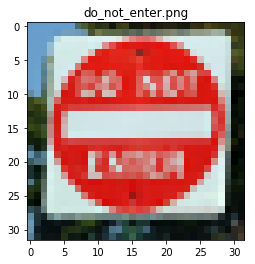

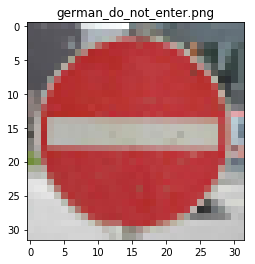

In [27]:
do_not_enter_files = [
              'do_not_enter.png',
              'german_do_not_enter.png']

draw_images(do_not_enter_files)

In [28]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    model = get_model_filename()
    
    # http://stackoverflow.com/questions/33759623/tensorflow-how-to-restore-a-previously-saved-model-python
    saver = tf.train.import_meta_graph(model + '.meta')
    saver.restore(sess, model)
    predict_test_images(sess)

Actual: [bend_right.png], Prediction: [Speed limit (80km/h)], (Id: 5)

Actual: [do_not_enter.png], Prediction: [Speed limit (80km/h)], (Id: 5)

Actual: [speed_limit.png], Prediction: [Speed limit (80km/h)], (Id: 5)

Actual: [stop_sign.png], Prediction: [Speed limit (120km/h)], (Id: 8)

Actual: [yield.png], Prediction: [Speed limit (80km/h)], (Id: 5)

Actual: [german_do_not_enter.png], Prediction: [Speed limit (80km/h)], (Id: 5)

Actual: [german_priority.png], Prediction: [No passing for vehicles over 3.5 metric tons], (Id: 10)

Actual: [german_keep_right.png], Prediction: [Speed limit (80km/h)], (Id: 5)

Actual: [german_no_passing.png], Prediction: [Speed limit (80km/h)], (Id: 5)

Actual: [uk_speed_limit_50.png], Prediction: [Speed limit (80km/h)], (Id: 5)



### Predictions

Actual: [bend_right.png], Prediction: [Speed limit (80km/h)], (Id: 5)

Actual: [do_not_enter.png], Prediction: [Speed limit (80km/h)], (Id: 5)

Actual: [speed_limit.png], Prediction: [Speed limit (80km/h)], (Id: 5)

Actual: [stop_sign.png], Prediction: [Speed limit (120km/h)], (Id: 8)

Actual: [yield.png], Prediction: [Speed limit (80km/h)], (Id: 5)

Actual: [german_do_not_enter.png], Prediction: [Speed limit (80km/h)], (Id: 5)

Actual: [german_priority.png], Prediction: [No passing for vehicles over 3.5 metric tons], (Id: 10)

Actual: [german_keep_right.png], Prediction: [Speed limit (80km/h)], (Id: 5)

Actual: [german_no_passing.png], Prediction: [Speed limit (80km/h)], (Id: 5)

Actual: [uk_speed_limit_50.png], Prediction: [Speed limit (80km/h)], (Id: 5)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

My model performs very poorly on captured pictures when compared to testing on the dataset. Its accuracy is 0%. 

Captured Picture Accuracy: 0%

Validation Accuracy: 99.8%

Test Accuracy: 98.27%

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [29]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

def certainty(sess, X_pred):
    softmax = tf.nn.softmax(logits)
    softmax_output = sess.run(softmax, feed_dict={x: X_pred, kp: 1.0})
    top_k = tf.nn.top_k(tf.constant(softmax_output), k=5)
    top_k_output = sess.run(top_k)
    return top_k_output

import matplotlib.image as mpimg

def calc_percent_diff(x1, x2):
    return ((x1 - x2) / x2) * 100

def eval_certainty(sess):
    X = read_test_images()
    
    top_k = certainty(sess, X)
    
    for i in range(len(test_files)):
        print('### Actual: ' + test_files[i])
        print()
        print('1st-to-2nd Percentage Difference: {:.1f}%'.format(calc_percent_diff(top_k.values[i][0], top_k.values[i][1])))
        print()
        for j in range(len(top_k.values[i])):
            id_pred = top_k.indices[i][j]
            print('{}. {:.1f}%, {}, {}'.format(j + 1, top_k.values[i][j] * 100, signname_map[id_pred], top_k.indices[i][j]))
            print()
        
with tf.Session() as sess:
    model = get_model_filename()
    
    # http://stackoverflow.com/questions/33759623/tensorflow-how-to-restore-a-previously-saved-model-python
    saver = tf.train.import_meta_graph(model + '.meta')
    saver.restore(sess, model)
    eval_certainty(sess)

### Actual: bend_right.png

1st-to-2nd Percentage Difference: 2.6%

1. 7.5%, Speed limit (80km/h), 5

2. 7.3%, Speed limit (120km/h), 8

3. 5.6%, Wild animals crossing, 31

4. 5.1%, Speed limit (100km/h), 7

5. 5.0%, No passing for vehicles over 3.5 metric tons, 10

### Actual: do_not_enter.png

1st-to-2nd Percentage Difference: 6.2%

1. 8.0%, Speed limit (80km/h), 5

2. 7.5%, Speed limit (120km/h), 8

3. 7.1%, No passing for vehicles over 3.5 metric tons, 10

4. 5.8%, Wild animals crossing, 31

5. 5.7%, Speed limit (100km/h), 7

### Actual: speed_limit.png

1st-to-2nd Percentage Difference: 23.3%

1. 8.2%, Speed limit (80km/h), 5

2. 6.7%, Speed limit (120km/h), 8

3. 5.7%, No passing for vehicles over 3.5 metric tons, 10

4. 5.3%, Speed limit (100km/h), 7

5. 4.6%, Speed limit (70km/h), 4

### Actual: stop_sign.png

1st-to-2nd Percentage Difference: 6.4%

1. 8.0%, Speed limit (120km/h), 8

2. 7.6%, Speed limit (80km/h), 5

3. 6.9%, No passing for vehicles over 3.5 metric tons, 10

4.

## Certainty of Predictions

### Actual: bend_right.png

1st-to-2nd Percentage Difference: 2.6%

1. 7.5%, Speed limit (80km/h), 5

2. 7.3%, Speed limit (120km/h), 8

3. 5.6%, Wild animals crossing, 31

4. 5.1%, Speed limit (100km/h), 7

5. 5.0%, No passing for vehicles over 3.5 metric tons, 10

### Actual: do_not_enter.png

1st-to-2nd Percentage Difference: 6.2%

1. 8.0%, Speed limit (80km/h), 5

2. 7.5%, Speed limit (120km/h), 8

3. 7.1%, No passing for vehicles over 3.5 metric tons, 10

4. 5.8%, Wild animals crossing, 31

5. 5.7%, Speed limit (100km/h), 7

### Actual: speed_limit.png

1st-to-2nd Percentage Difference: 23.3%

1. 8.2%, Speed limit (80km/h), 5

2. 6.7%, Speed limit (120km/h), 8

3. 5.7%, No passing for vehicles over 3.5 metric tons, 10

4. 5.3%, Speed limit (100km/h), 7

5. 4.6%, Speed limit (70km/h), 4

### Actual: stop_sign.png

1st-to-2nd Percentage Difference: 6.4%

1. 8.0%, Speed limit (120km/h), 8

2. 7.6%, Speed limit (80km/h), 5

3. 6.9%, No passing for vehicles over 3.5 metric tons, 10

4. 5.8%, Speed limit (100km/h), 7

5. 5.7%, Wild animals crossing, 31

### Actual: yield.png

1st-to-2nd Percentage Difference: 25.7%

1. 8.4%, Speed limit (80km/h), 5

2. 6.7%, Speed limit (120km/h), 8

3. 5.9%, Speed limit (100km/h), 7

4. 5.7%, No passing for vehicles over 3.5 metric tons, 10

5. 4.6%, Speed limit (70km/h), 4

### Actual: german_do_not_enter.png

1st-to-2nd Percentage Difference: 13.7%

1. 8.4%, Speed limit (80km/h), 5

2. 7.4%, Speed limit (120km/h), 8

3. 6.9%, No passing for vehicles over 3.5 metric tons, 10

4. 5.9%, Speed limit (100km/h), 7

5. 5.3%, Wild animals crossing, 31

### Actual: german_priority.png

1st-to-2nd Percentage Difference: 15.7%

1. 7.7%, No passing for vehicles over 3.5 metric tons, 10

2. 6.7%, Speed limit (80km/h), 5

3. 6.2%, Speed limit (120km/h), 8

4. 5.7%, Wild animals crossing, 31

5. 5.3%, Speed limit (100km/h), 7

### Actual: german_keep_right.png

1st-to-2nd Percentage Difference: 38.3%

1. 6.5%, Speed limit (80km/h), 5

2. 4.7%, No passing for vehicles over 3.5 metric tons, 10

3. 4.6%, Speed limit (120km/h), 8

4. 4.4%, Keep right, 38

5. 4.4%, Speed limit (70km/h), 4

### Actual: german_no_passing.png

1st-to-2nd Percentage Difference: 12.2%

1. 8.2%, Speed limit (80km/h), 5

2. 7.3%, Speed limit (120km/h), 8

3. 6.9%, No passing for vehicles over 3.5 metric tons, 10

4. 5.3%, Speed limit (100km/h), 7

5. 4.6%, No passing, 9

### Actual: uk_speed_limit_50.png

1st-to-2nd Percentage Difference: 50.9%

1. 8.3%, Speed limit (80km/h), 5

2. 5.5%, Speed limit (120km/h), 8

3. 5.2%, No passing for vehicles over 3.5 metric tons, 10

4. 4.6%, Speed limit (100km/h), 7

5. 4.5%, Speed limit (70km/h), 4

**Answer:**

The model is uncertain of most of its predictions. The top-5 softmax probabilities were all single-digit percentages around 6% or 7%. The prediction with highest probability is 8.4%. 

The most confident prediction (i.e., biggest difference between 1st and 2nd prediction probabilities) is the UK 50 km/h speed limit. The model predicted an 80 km/h speed limit sign with 8.3% probability and an 120 km/h speed limit sign with 5.5% probability. I can see how a 50 km/h sign looks similar to an 80 km/h sign.

For the American speed limit sign, the model predicts various speed limit signs for the 1st, 2nd, 4th, and 5th predictions.
For the German "Keep right" sign, the model predicts "Keep right" for the 4th prediction.
For the German "No passing" sign, the model predicts "No passing" signs for the 3rd and 5th predictions.
For the German speed limit sign, the model predicts various speed limit signs for the 1st, 2nd, 4th, and 5th predictions.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.